In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [160]:
import skimage

In [2]:
os.path.abspath('data')

'c:\\Users\\seann\\dsc_180a\\sat_img\\SAR-satelite-image-ship-detection\\sean_notebooks\\data'

In [ ]:
# make list of offshore images and inshore images
# make label list for test images 
    # if ... in offshore then 1 else 0
# read in test images

In [29]:
# os.path.abspath(r'sat_img\data\test\images\14_1_1.jpg')
plt.imread(r'C:\Users\seann\dsc_180a\sat_img\data\test\images\14_1_1.jpg')

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [19, 19, 19],
        [20, 20, 20],
        [28, 28, 28]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [15, 15, 15],
        [21, 21, 21],
        [33, 33, 33]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [11, 11, 11],
        [20, 20, 20],
        [31, 31, 31]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [13, 13, 13],
        [23, 23, 23],
        [21, 21, 21]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [22, 22, 22],
        [33, 33, 33],
        [31, 31, 31]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [21, 21, 21],
        [26, 26, 26],
        [21, 21, 21]]], dtype=uint8)

# load in data

In [2]:
# read in offshore lists and inshore list 
#os.path.abspath('data/main/test_offshore.txt')
with open(r'C:\Users\seann\dsc_180a\sat_img\data\main\test_offshore.txt') as f:
    off_shore = f.readlines()
    for i in range(len(off_shore)):
        off_shore[i] = off_shore[i].replace('\n','')
#os.path.abspath('data/main/test_inshore.txt')
with open(r'C:\Users\seann\dsc_180a\sat_img\data\main\test_inshore.txt') as f:
    in_shore = f.readlines()
    for i in range(len(in_shore)):
        in_shore[i] = in_shore[i].replace('\n','')

In [3]:
test_ = []
# off_shore = []
# in_shore = []
test_labels = [] # 1 == offshore, 0 == on_shore
test_fname = []

# with open(r'C:\Users\seann\dsc_180a\sat_img\data\main\test_offshore.txt') as f:
#     while True:
#         line = f.readline()
#         line = line.replace("\n","")
#         filename = line + ".jpg"
#         off_shore.append(filename)
# with open(r'C:\Users\seann\dsc_180a\sat_img\data\main\test_inshore.txt') as f:
#     while True:
#         line = f.readline()
#         line = line.replace("\n","")
#         filename = line + ".jpg"
#         in_shore.append(filename)
        
#r'C:\Users\seann\dsc_180a\sat_img\data\main\test.txt'
# with open(os.path.abspath('data/main/test.txt')) as f:
with open(r'C:\Users\seann\dsc_180a\sat_img\data\main\test.txt') as f:
    test = f.readlines()
    for i in range(len(test)):
        curr_img = test[i].replace('\n','') # get curr img name
        test_fname.append(curr_img)
        if curr_img in off_shore:
            test_labels.append(1)
        else:
            test_labels.append(0)
        test[i] = plt.imread(r'C:\Users\seann\dsc_180a\sat_img\data\test\images\{}.jpg'.format(curr_img))
        #os.path.abspath('data/test/images/{}.jpg'.format(curr_img))

# look at diff images and their mean/median/max/min

In [7]:
test_fname.index('11_1_1')

300

In [20]:
idx = 300
print('mean:',test[idx].mean())
print('median:',np.median(test[idx]))
print('max:',test[idx].max())
print('min:',test[idx].min())
print('label:',test_labels[idx])
print('1st quantile:', np.percentile(test[idx], 25))
print('3rd quantile:', np.percentile(test[idx], 75))
print(test[idx].sum())

mean: 11.9796359375
median: 0.0
max: 103
min: 0
label: 1
1st quantile: 0.0
3rd quantile: 24.0
23000901


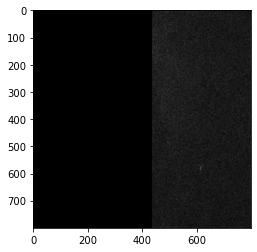

In [13]:
plt.imshow(test[300])

In [29]:
normalized = (test[300] - test[300].mean()) / test[300].std()

In [39]:
print(normalized.mean())
print(normalized.max())
print(np.median(normalized))


1.956953118072609e-17
6.234869340101318
-0.8206016926169079


In [14]:
test_fname.index('11_8_25')

557

In [22]:
idx = 557
print('mean:',test[idx].mean())
print('median:',np.median(test[idx]))
print('max:',test[idx].max())
print('min:',test[idx].min())
print('label:',test_labels[idx])
print('1st quantile:', np.percentile(test[idx], 25))
print('3rd quantile:', np.percentile(test[idx], 75))
print(test[idx].sum())


mean: 102.0405203125
median: 100.0
max: 255
min: 14
label: 1
1st quantile: 84.0
3rd quantile: 118.0
195917799


True

In [12]:
# normalized2 = (test[557] - test[557].mean()) / test[557].std()
normalized2 = (test[557] - np.median(test[557])) / (np.percentile(test[557], 75) -  np.percentile(test[557], 25))

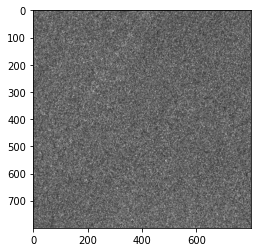

In [13]:
plt.imshow(test[557])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


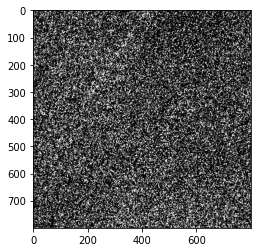

In [14]:
plt.imshow(normalized2)

In [23]:
print('mean:',normalized2.mean())
print('median:',np.median(normalized2))
print('max:',normalized2.max())
print('min:',normalized2.min())
print('label:',test_labels[idx])
print('1st quantile:', np.percentile(normalized2, 25))
print('3rd quantile:', np.percentile(normalized2, 75))
print(normalized2.sum())

mean: 0.06001530330882352
median: 0.0
max: 4.5588235294117645
min: -2.5294117647058822
label: 1
1st quantile: -0.47058823529411764
3rd quantile: 0.5294117647058824
115229.38235294116


In [41]:
test_fname.index('11_1_10')

301

In [43]:
idx = 301
print('mean:',test[idx].mean())
print('median:',np.median(test[idx]))
print('max:',test[idx].max())
print('min:',test[idx].min())
print('label:',test_labels[idx])
print('1st quantile:', np.percentile(test[idx], 25))
print('3rd quantile:', np.percentile(test[idx], 75))
print(test[idx].sum())

mean: 183.06940625
median: 188.0
max: 255
min: 0
label: 0
1st quantile: 151.0
3rd quantile: 226.0
351493260


In [16]:
# normalized3 = (test[301] - test[301].mean()) / test[301].std()
normalized3 = (test[301] - np.median(test[301])) / (np.percentile(test[301], 75) -  np.percentile(test[301], 25))

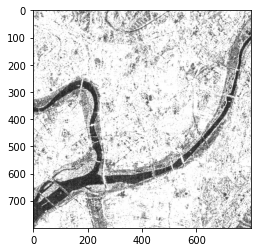

In [17]:
plt.imshow(test[301])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


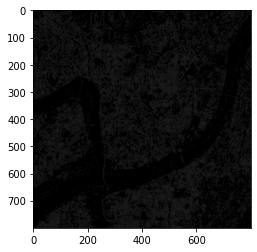

In [18]:
plt.imshow(normalized3)

In [19]:
print('mean:',normalized3.mean())
print('median:',np.median(normalized2))
print('max:',normalized3.max())
print('min:',normalized3.min())
print('label:',test_labels[idx])
print('1st quantile:', np.percentile(normalized3, 25))
print('3rd quantile:', np.percentile(normalized3, 75))

mean: -0.5055662852112675
median: 0.0
max: 0.09859154929577464
min: -3.408450704225352
label: 0
1st quantile: -0.9154929577464789
3rd quantile: 0.08450704225352113


In [17]:
test_fname.index('12_1_24')

916

mean: 183.06940625
median: 188.0
max: 255
min: 0
label: 0
1st quantile: 151.0
3rd quantile: 226.0
351493260


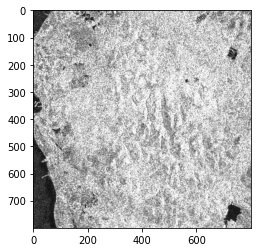

In [18]:
idx = 916
print('mean:',test[idx].mean())
print('median:',np.median(test[idx]))
print('max:',test[idx].max())
print('min:',test[idx].min())
print('label:',test_labels[idx])
print('1st quantile:', np.percentile(test[idx], 25))
print('3rd quantile:', np.percentile(test[idx], 75))
print(test[idx].sum())
# normalized3 = (test[301] - test[301].mean()) / test[301].std()
# normalized3 = (test[301] - np.median(test[301])) / (np.percentile(test[301], 75) -  np.percentile(test[301], 25))
plt.imshow(test[idx])
# plt.imshow(normalized3)
# print('mean:',normalized3.mean())
# print('median:',np.median(normalized2))
# print('max:',normalized3.max())
# print('min:',normalized3.min())
# print('label:',test_labels[idx])
# print('1st quantile:', np.percentile(normalized3, 25))
# print('3rd quantile:', np.percentile(normalized3, 75))

In [ ]:
test_fname.index('12_1_25')

917

mean: 183.8087421875
median: 185.0
max: 255
min: 12
label: 0
1st quantile: 150.0
3rd quantile: 222.0
352912785


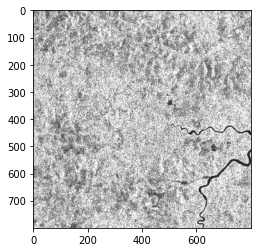

In [ ]:
idx = 917
print('mean:',test[idx].mean())
print('median:',np.median(test[idx]))
print('max:',test[idx].max())
print('min:',test[idx].min())
print('label:',test_labels[idx])
print('1st quantile:', np.percentile(test[idx], 25))
print('3rd quantile:', np.percentile(test[idx], 75))
print(test[idx].sum())
# normalized3 = (test[301] - test[301].mean()) / test[301].std()
normalized3 = (test[idx] - np.median(test[idx])) / (np.percentile(test[idx], 75) -  np.percentile(test[idx], 25))
plt.imshow(test[idx])
# plt.imshow(normalized3)
# print('mean:',normalized3.mean())
# print('median:',np.median(normalized2))
# print('max:',normalized3.max())
# print('min:',normalized3.min())
# print('label:',test_labels[idx])
# print('1st quantile:', np.percentile(normalized3, 25))
# print('3rd quantile:', np.percentile(normalized3, 75))
# print(normalized3.sum())

# Trying classification by thresholding and summing the pixel values

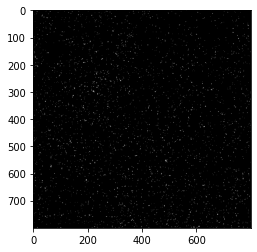

In [75]:
# grayish offshore img idx: 557
# blackish offshore img idx: 300
# inshore img idx = 916
gray_img = np.copy(test[557])
gray_img[gray_img < 170] = 0
gray_img[gray_img >= 170] = 225
plt.imshow(gray_img)
# gray_img.sum()

In [53]:
test_gray = []
for img in in_shore:
    idx = test_fname.index(img)
    img_vals = np.copy(test[idx])
    img_vals[img_vals < 170] = 0
    img_vals[img_vals >= 170] = 225
    # plt.imshow(gray_img)
    # gray_img.sum()
    test_gray.append(img_vals.sum())
np.array(test_gray)

array([ 14903325,  72702900, 170724375, 136987200,  35052075, 178553025,
       224073675, 142511400,  61006500, 236174400, 180394425,  77558175,
        84562650, 125078850,  85926825,  67697100, 163037475, 223387200,
        10748700,  81349650, 250674075,  11779425,  10338975,  97098750,
       316682325, 301974075,  43362000, 207071100, 255353175,   2404350,
        44464950,  27384075, 234821700, 205308000, 339105150, 280723725,
       336846600, 313869600, 268490025, 248011875,  89461125, 163579500,
       213011775, 233589825, 286595550, 343636425,  10779750,  26203500,
         1108350,  61879275, 286328925, 241106625, 280500975, 274364550,
       277248825, 237971250, 228312000, 103707000,   5182650, 112294350,
       227792925, 233983350, 303745275, 226521225,  75336750,  61614675,
        31550850,  55769850, 209563200, 248981175,  52106625, 149137875,
       202966425,   2098575,  46348200,  86709825,  64796625,  97771725,
        82419525, 346920975, 367007625, 340609725, 

In [55]:
np.array(test_gray).mean()

118639045.10443865

In [54]:
test_gray2 = []
for img in off_shore:
    idx = test_fname.index(img)
    img_vals = np.copy(test[idx])
    img_vals[img_vals < 170] = 0
    img_vals[img_vals >= 170] = 225
    # plt.imshow(gray_img)
    # gray_img.sum()
    test_gray2.append(img_vals.sum())
np.array(test_gray2).mean()

2427202.1038495973

In [56]:
# use means later or look at histograms to get thresholds
(2427202.1038495973 + 118639045.10443865) / 2

60533123.604144126

In [ ]:
# before thresholding
110_922_988 # mean sums for off_shore
242_249_516 # mean sums for in_shore
407_241_204 # in_shore img sum
195_917_799 # off_shore grayish sum
23_000_901 # off_shore img black sum
188_040_507

In [57]:
preds = []
for img in test:
    # copy
    # threshold
    # then get sum
    # look at sum val to determine label
    copied = np.copy(img)
    copied[copied < 170] = 0
    copied[copied >= 170] = 225
    copied_sum = copied.sum()
    if copied_sum < 60533123.604144126:
        preds.append(1)
    else:
        preds.append(0)
    

In [74]:
# acc
print('acc:', (np.array(preds) == np.array(test_labels)).mean())
# mse
# (np.array(preds) - np.array(test_labels)**2).mean()
(np.array(preds) == np.array(test_labels)).sum() - len(preds)

acc: 0.9243333333333333


-227

0
0


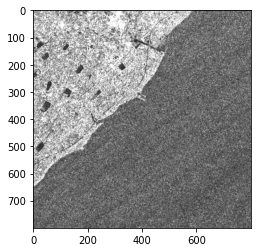

In [67]:
idx = test_fname.index('11_1_16')
print(test_labels[idx])
print(preds[idx])
plt.imshow(test[idx])


in_shore_imgs = []
for label in inshore:
    

# models for clf

In [146]:
# test[0]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(test, test_labels, test_size=0.3)

In [196]:
model = KNeighborsClassifier(2)
model.fit(np.reshape(test_gray[:200],(200,640000)),test_labels[:200])

KNeighborsClassifier(n_neighbors=2)

In [232]:
model.predict(np.reshape(test_gray[557],(1,640000)))

array([1])

In [233]:
test_labels[557]

1

In [231]:
test_fname.index('11_8_25')

557

In [223]:
np.reshape(test[:200],(200,1920000))

array([[  0,   0,   0, ...,  81,  81,  81],
       [ 94,  94,  94, ..., 155, 155, 155],
       [ 45,  45,  45, ...,  90,  90,  90],
       ...,
       [ 94,  94,  94, ..., 142, 142, 142],
       [ 97,  97,  97, ..., 132, 132, 132],
       [100, 100, 100, ..., 126, 126, 126]], dtype=uint8)

In [48]:
model_2 = KNeighborsClassifier(2)
model_2.fit(np.reshape(X_train,(2100,1920000)), y_train)

KNeighborsClassifier(n_neighbors=2)

In [53]:
model_2.predict(np.reshape(X_test[200],(1,1920000)))

array([1])

In [55]:
y_test[200]

0

# Deep Learning Model

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
# import matplotlib.pyplot as plt
# import numpy as np
from torchvision.datasets import ImageFolder
# import os
from torchvision import models, transforms
import torch.optim as optim
import os

## load in data


In [2]:
import shutil

In [15]:
# run to move data from test folder into offshore and onshore folders
# need to do this for pytorch model

with open("data/main/test_offshore.txt") as f:
    while True:
        line =  f.readline()
        line = line.replace("\n","")
        filename = line + ".jpg"

        original = os.path.abspath("data/test/images/" + filename)
        
        target = os.path.abspath("data/test/offshore/" + filename)

        try:
            shutil.move(original, target)
        except Exception as e:
            print(e)
#             print(filename + " NOT FOUND - offshore")

        if not line:
            break


with open("data/main/test_inshore.txt") as f:
    while True:
        line =  f.readline()
        line = line.replace("\n","")
        filename = line + ".jpg"

        original = os.path.abspath("data/test/images/" + filename)
        
        target = os.path.abspath("data/test/inshore/" + filename)

        try:
            shutil.move(original, target)
        except Exception as e:
            print(e)
#             print(filename + " NOT FOUND - inshore")

        if not line:
            break


.jpg NOT FOUND - inshore


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
batch_size = 128

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Compose([transforms.Resize((32,32))])])

In [9]:
dataset = ImageFolder(os.path.abspath('data/image_data'),transform=transform)

In [10]:
train_set, test_set = torch.utils.data.random_split(dataset, [2100,900])

In [11]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                          shuffle=False)

In [12]:
dataloaders = [train_loader, test_loader]

In [56]:
classes = os.listdir('data/image_data')

In [14]:
model = models.resnet50(pretrained=True).to(device)

/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /tmp/xdg-cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [15]:
for param in model.parameters():
    param.requires_grad = False   
    
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

In [17]:
def train_model(model, criterion, optimizer, num_epochs=3):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in [0,1]:
            if phase == 0:
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 0:
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase])
            epoch_acc = running_corrects.double() / len(dataloaders[phase])

            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc))
    return model

In [18]:
model_trained = train_model(model, criterion, optimizer, num_epochs=20)

Epoch 1/20
----------
0 loss: 53.1351, acc: 105.2353
1 loss: 63.5819, acc: 85.5000
Epoch 2/20
----------
0 loss: 21.3831, acc: 117.2353
1 loss: 68.0275, acc: 90.6250
Epoch 3/20
----------
0 loss: 17.4939, acc: 117.6471
1 loss: 24.2140, acc: 104.5000
Epoch 4/20
----------
0 loss: 15.0545, acc: 118.1765
1 loss: 20.2913, acc: 105.7500
Epoch 5/20
----------
0 loss: 13.3800, acc: 119.2353
1 loss: 16.0789, acc: 107.3750
Epoch 6/20
----------
0 loss: 13.8224, acc: 119.0000
1 loss: 19.1509, acc: 106.3750
Epoch 7/20
----------
0 loss: 16.3888, acc: 118.1176
1 loss: 19.2440, acc: 107.0000
Epoch 8/20
----------
0 loss: 13.7782, acc: 119.6471
1 loss: 18.3112, acc: 106.6250
Epoch 9/20
----------
0 loss: 11.7947, acc: 119.6471
1 loss: 20.7576, acc: 105.8750
Epoch 10/20
----------
0 loss: 10.6589, acc: 120.1765
1 loss: 17.3058, acc: 107.7500
Epoch 11/20
----------
0 loss: 10.3896, acc: 119.9412
1 loss: 24.6929, acc: 106.2500
Epoch 12/20
----------
0 loss: 9.2795, acc: 120.4706
1 loss: 18.1449, acc: 1

In [19]:
torch.save(model_trained.state_dict(), 'offshore_onshore_models/offshore_inshore_clf_20e.h5')

In [26]:
# get test images to predict
imgs,labels = next(iter(test_loader))

In [28]:
# have to put these loaded images onto gpu 
# for it to be able to be predicted
imgs = imgs.to(device)

In [29]:
# predictions then take max
model_trained(imgs)

tensor([[ 1.2086, -1.1320],
        [-2.1553,  2.7190],
        [-3.3698,  3.4276],
        [-2.9326,  3.0845],
        [-4.6850,  5.1292],
        [-3.7170,  4.1803],
        [-1.1486,  1.3027],
        [-2.1081,  2.4494],
        [-4.1944,  4.7184],
        [ 0.3859, -0.1910],
        [-3.3067,  3.6005],
        [-2.0075,  1.7627],
        [ 2.7192, -2.7439],
        [-2.8336,  2.9401],
        [-3.1050,  3.5653],
        [-3.2536,  3.5505],
        [ 0.5524, -0.5620],
        [ 1.2144, -0.8489],
        [-3.1476,  3.3994],
        [ 0.3344, -0.2286],
        [-1.3327,  1.2737],
        [-6.5868,  7.1222],
        [-2.4824,  2.5910],
        [-1.5170,  1.5318],
        [-3.8898,  3.9185],
        [-3.9736,  4.1435],
        [-4.2081,  4.1977],
        [-4.3121,  4.7277],
        [-2.2191,  2.0568],
        [-1.6312,  2.1192],
        [-4.0913,  4.1223],
        [-3.9435,  4.0207],
        [-3.4363,  3.6899],
        [-4.9955,  5.5347],
        [-4.3525,  4.6030],
        [-2.6200,  2

### predict on train

In [98]:
to_predict = ImageFolder(os.path.abspath('data/train'), transform=transform)

In [99]:
pred_loader = torch.utils.data.DataLoader(to_predict, batch_size=batch_size,
                                          shuffle=False)

In [45]:
imgs,labels = next(iter(pred_loader))

In [46]:
imgs = imgs.to(device)

In [50]:
len(imgs)

128

In [47]:
preds = model_trained(imgs)

In [57]:
_, predicted = torch.max(preds, 1)

In [53]:
to_predict.imgs[0][0][to_predict.imgs[0][0].rfind('/') + 1:]

'01_10_1.jpg'

In [ ]:
# iterate thru train images and predict using model
# then get image name
    # note: have to isolate the last image name
    # to_predict.imgs[0][0].rfind('/') til end

In [54]:
# create list of file names
fnames = to_predict.imgs
for i in range(len(fnames)):
    fnames[i] = fnames[i][0]
    fnames[i] = fnames[i][fnames[i].rfind('/') + 1:]

In [100]:
imgs_labels = []
start_idx = 0
end_idx = 0
done_looping = False
while not done_looping:
    try:
        # to see if there is a next
        imgs,labels = next(iter(pred_loader))
    except StopIteration:
        done_looping = True
    else:
        imgs = imgs.to(device)
        preds = model_trained(imgs)
        # get predicted classes
        _, predicted = torch.max(preds, 1)
        
        # get corresponding image labels
        # for some reason the predictions are opposite so switch the prediction
        labels = list(map(lambda x: classes[abs(x-1)], predicted))
        
        # get img names
        img_idx = len(imgs)
        
        end_idx = end_idx + img_idx
        img_fnames = fnames[start_idx: end_idx]
        start_idx = end_idx
        
        for i in range(img_idx):
            f = open("train_labels.txt", "a")
            f.write(img_fnames[i] + ',' + labels[i] + '\n')
            f.close()
        
        
        
        

IndexError: list index out of range

In [92]:
labels

['inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'offshore',
 'offshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'offshore',
 'offshore',
 'offshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'offshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'offshore',
 'offshore',
 'offshore',
 'offshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'offshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'offshore',
 'offshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'offshore',
 'inshore',
 'inshore',
 'inshore',
 'offshore',
 'offshore',
 'offshore',
 'offshore',
 'offshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore',
 'inshore

In [97]:
abs(0-1)

1